# Hierarchical Clustering - Agglomerative

In [53]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 

%matplotlib inline

In [54]:
def check_missing_data(dataset):  
    print('Qtd rows X columns:{}'.format(dataset.shape))
    print('\nAre there any Missing values?:{}'.format(dataset.isnull().values.any()))
    print('\nTotal of missing ROWS values: {}'.format(dataset.shape[0] - dataset.dropna().shape[0]))    
    print('\nHas duplicated values? how to drop => df=df.drop_duplicates() \n{}'.format(dataset.duplicated().value_counts()))    
    print('\nMissing values by columns:\n{}'.format(dataset.isnull().sum()))
    print('\nTotal sum of missing values: {}'.format(dataset.isnull().sum().sum()))
    print('\n')
    print(dataset.info())

In [55]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [56]:
df = pd.DataFrame()
df = pd.read_csv('data/daft_apartments.csv')
df.head()

,Unnamed: 0,page_url,number_bathrooms,number_bedrooms,description,display_address,features,manager_id,photos,price,number_of_views,created_at,price_period
0,0,https://www.daft.ie/for-rent/apartment-2-bedro...,2,2,"This elegant two bedroom apartment, offers inc...","2 Bedroom Apartment, Capital Dock Residence, G...","['Parking', 'Central Heating', 'Cable Televisi...",Eoin Grant,['https://photos.cdn.dsch.ie/OTRlZDA3YWQwNzFjO...,2970,22239,2021-03-18,month
1,1,https://www.daft.ie/for-rent/apartment-three-b...,2,3,"This elegant three bedroom apartment, in Dubli...","Three Bedroom Apartment, Capital Dock Residenc...","['Parking', 'Central Heating', 'Cable Televisi...",Eoin Grant,['https://photos.cdn.dsch.ie/NmYxOWJhM2M5NTVlM...,3690,2763,2021-03-18,month
2,2,https://www.daft.ie/for-rent/apartment-2-bedro...,2,2,"This elegant two bedroom apartment, in Dublin’...","2 Bedroom Serviced Apartment, Capital Dock Res...","['Parking', 'Central Heating', 'Cable Televisi...",Eoin Grant,['https://photos.cdn.dsch.ie/OGNkYmRjMzc5YmExN...,4000,17421,2021-03-21,month
3,3,https://www.daft.ie/for-rent/apartment-apartme...,1,1,To provide you with extra peace of mind when c...,"Apartment 1, 1A, Quayside Quarter, North Wall ...","['Parking', 'Central Heating', 'Cable Televisi...",Laura Foody,['https://photos.cdn.dsch.ie/YjFjODhmMmNmMzEwY...,2300,6892,2021-03-03,month
4,4,https://www.daft.ie/for-rent/apartment-apartme...,1,1,To provide you with extra peace of mind when c...,"Apartment 103, Quayside Quarter, North Wall Qu...","['Parking', 'Central Heating', 'Cable Televisi...",Laura Foody,['https://photos.cdn.dsch.ie/YjFjODhmMmNmMzEwY...,2430,9759,2021-03-03,month


In [57]:
check_missing_data(df)

Qtd rows X columns:(1927, 13)

Are there any Missing values?:True

Total of missing ROWS values: 3

Has duplicated values? how to drop => df=df.drop_duplicates() 
False    1927
dtype: int64

Missing values by columns:
Unnamed: 0          0
page_url            0
number_bathrooms    0
number_bedrooms     0
description         3
display_address     0
features            0
manager_id          0
photos              0
price               0
number_of_views     0
created_at          0
price_period        0
dtype: int64

Total sum of missing values: 3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1927 non-null   int64 
 1   page_url          1927 non-null   object
 2   number_bathrooms  1927 non-null   int64 
 3   number_bedrooms   1927 non-null   int64 
 4   description       1924 non-null   object
 5   display_address

In [58]:
df.describe()

,Unnamed: 0,number_bathrooms,number_bedrooms,price,number_of_views
count,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000
mean,963.000000,1.438505,1.772704,1886.048262,2923.406331
std,556.421303,0.634121,0.722162,670.518496,3805.668799
min,0.000000,1.000000,1.000000,125.000000,104.000000
25%,481.500000,1.000000,1.000000,1550.000000,1039.000000
50%,963.000000,1.000000,2.000000,1800.000000,1917.000000
75%,1444.500000,2.000000,2.000000,2100.000000,3262.500000
max,1926.000000,8.000000,8.000000,8500.000000,68165.000000


In [59]:
# Found empty list of features
for i in range(500,530):
    print(df['features'][i])

['Central Heating', 'Washing Machine', 'Dryer', 'Dishwasher', 'Microwave', 'Garden / Patio / Balcony']
['Central Heating', 'Cable Television', 'Washing Machine', 'Dryer', 'Dishwasher', 'Microwave', 'Internet']
['Parking']
['Parking', 'Central Heating', 'Washing Machine', 'Dryer', 'Microwave', 'Internet', 'Garden / Patio / Balcony']
['Parking', 'Washing Machine', 'Dishwasher', 'Microwave', 'Garden / Patio / Balcony']
['Parking', 'Central Heating', 'Washing Machine', 'Microwave', 'Garden / Patio / Balcony', 'Serviced Property']
['Parking', 'Washing Machine', 'Dryer', 'Microwave', 'Internet', 'Garden / Patio / Balcony']
['Central Heating', 'Alarm', 'Cable Television', 'Washing Machine', 'Microwave', 'Wheelchair Access', 'Internet', 'Garden / Patio / Balcony']
['Parking', 'Central Heating', 'Cable Television', 'Washing Machine', 'Microwave', 'Internet', 'Garden / Patio / Balcony']
['Parking', 'Washing Machine', 'Dryer', 'Microwave', 'Internet']
['Parking', 'Central Heating', 'Washing Machi

In [251]:
# display_address


for i in range(500,530):
    print(df['display_address'][i])


St Kevins Church, South Circular Road, Dublin 8
240 The Richmond North Brunswick Street, Dublin 7
Rockview, Simons Ridge, Sandyford, Dublin 18
apt 9 landscape court landscape road churchtown, Churchtown, Dublin 14
La Rochelle, Christchurch, Dublin 8
15 0rwell Place Marianella, Rathgar, Dublin 6
17 St Patricks Ave off Spring Garden Street, North Strand, Dublin 3
65 Millennium Tower, Grand Canal Dock, Dublin 4
Parkview Court, Harold's Cross, Dublin 6
Aberdeen Street, Dublin 7
The Court, Bettyglen, Watermill Road, Raheny, D.5., Dublin 5
Apartment 63, Maltin House, Irish Financial Servic, Dublin 1
Nethercross Court, North Street, Swords, Co. Dublin
25 liffey walk The Lotts Dublin 1, Dublin 1
The Pines, Herbert Park Lane, Dublin 4
22 The Sweepstakes, Ballsbridge, Dublin 4
The Pines, Herbert Park Lane, Dublin 4
Apartment 2, 43 Pembroke Road, Ballsbridge, Dublin 4
The Cedars, Herbert Park Lane, Ballsbridge, Dublin 4
The Pines, Herbert Park Lane, Dublin 4
Herbert Park Lane, Ballsbridge, Dublin

In [60]:
df_empty = df[ df["features"] == '[]']
df_empty.shape
# print(df_empty.iloc[198])

(200, 13)

In [287]:
# All Adresses are based on Dublin city
# for i in range(10):
#     print(df['display_address'][i])

In [61]:
# Remove null description
null_description = pd.isnull(df["description"])

# df[null_description]
# df.iloc[[ 63,64,769]]

description_indexes =  df[null_description].index.values.tolist()

df.drop(description_indexes, inplace=True)

df.isnull().values.any()

False

In [62]:
# Remove empty features
empty_features_indices = df[ df["features"] == '[]'].index.values.tolist()

# len(empty_features_indices)

df.drop(empty_features_indices, inplace=True)

df[ df["features"] == '[]'].shape

(0, 13)

In [63]:
df.shape

(1724, 13)

In [64]:
# Feature engineering / selection

# df['display_address'].str.split(',').str[-1].head(10)

# Create New Column: Region
df['Region'] = df['display_address'].str.split(',').str[-1]

#df.iloc[14]['display_address']

In [65]:
df['Region'].value_counts()

 Dublin 1                   252
 Dublin 4                   236
 Dublin 2                   233
 Co. Dublin                 188
 Dublin 8                   171
 Dublin 6                   133
 Dublin 7                    86
 Dublin 18                   78
 Dublin 3                    65
 Dublin 14                   51
 Dublin 9                    41
 Dublin 15                   33
 Dublin 11                   21
 Dublin 13                   17
 Dublin 24                   16
 Dublin 16                   15
 Dublin 12                   14
 Dublin 5                    13
 Dublin 22                    8
 Dublin 6W                    8
 Dublin 20                    8
 Dublin 10                    3
Alexandra Place               3
 East Road                    2
 Off Hami                     2
 Christchurch                 2
 Ringsend                     2
 Crosbie's Yard               2
 Dublin 17                    2
 Balgriffin                   1
 Sandymount                   1
 110 Phi

In [66]:
# Remove regions with 3 or less quantities
regions = df['Region'].value_counts()
region_list = regions[regions.values <= 3].index.values.tolist()
#region_list

In [270]:
# df_RegionsToDelete = df[df['Region'].isin(region_list)]
# print(df_RegionsToDelete.shape)
# df_RegionsToDelete['Region'].value_counts()

In [67]:
regions_indices = df[df['Region'].isin(region_list)].index.values.tolist()
df.drop(regions_indices, inplace=True)

In [68]:
print(df.shape)
df[df['Region'].isin(region_list)].count()

(1687, 14)


Unnamed: 0          0
page_url            0
number_bathrooms    0
number_bedrooms     0
description         0
display_address     0
features            0
manager_id          0
photos              0
price               0
number_of_views     0
created_at          0
price_period        0
Region              0
dtype: int64

In [69]:
# Remove extra spaces
df['Region'] = df['Region'].str.strip()

df.loc[0,"Region"]


'Dublin 2'

In [70]:
features_list = ['Parking', 'Central Heating', 'Washing Machine', 'Dryer', 'Dishwasher', 'Microwave', 'Pets Allowed', 'Wheelchair Access', 'Garden / Patio / Balcony', 'Serviced Property']

print(df.shape)
# df.query('display_address.str.contains("Islandbridge")', engine='python')

for value in features_list:    
    # df.query('features.str.contains("Pets Allowed")', engine='python').shape[0]
    print(value, df.query('features.str.contains(@value)', engine='python').count()[0])

(1687, 14)
Parking 1077
Central Heating 1293
Washing Machine 1536
Dryer 994
Dishwasher 942
Microwave 1382
Pets Allowed 93
Wheelchair Access 139
Garden / Patio / Balcony 1027
Serviced Property 217


In [329]:
# # Code template to automate feature extraction from features column 
# df['Pets Allowed'] = 0
# index = df.query('features.str.contains("Pets Allowed")', engine='python').index
# # now use df.loc to set values only to those rows
# df.loc[index,'Pets Allowed'] = 1
# df['Pets Allowed'].value_counts()
# print(df['Pets Allowed'].head())
# # cleanup template test
# df.drop(['Pets Allowed'] , axis='columns', inplace=True)

In [71]:
# Create new columns based on feature column

for value in features_list:    
    # df.query('features.str.contains("Pets Allowed")', engine='python').shape[0]
    print(value, df.query('features.str.contains(@value)', engine='python').count()[0])
    df[value] = 0    
    index = df.query('features.str.contains(@value)', engine='python').index    
    df.loc[index,value] = 1


Parking 1077
Central Heating 1293
Washing Machine 1536
Dryer 994
Dishwasher 942
Microwave 1382
Pets Allowed 93
Wheelchair Access 139
Garden / Patio / Balcony 1027
Serviced Property 217


In [72]:
# Todo: try to Find/fix 'Co. Dublin' adresses

result = df[df['Region'] == 'Co. Dublin']
# # result.loc[14,"display_address"]

# for item in result['display_address']:
#     print(item)
    
result2 = result['display_address'].str.split(',').str[-2]
result2.value_counts()

 Blackrock        34
 Dun Laoghaire    27
 Stillorgan       21
 Malahide         18
 Swords           15
 Lucan            10
 Monkstown         7
 Booterstown       7
 Citywest          6
 Dalkey            6
 Mount Merrion     5
 Killiney          4
 Portmarnock       4
 Saggart           3
 Ballybrack        2
 Rathcoole         2
 Balbriggan        2
 Glenageary        2
 Sandycove         2
 Deans Grange      1
 Co.Dublin         1
 Adamstown         1
 Inchicore         1
 Kinsealy          1
 Christchurch      1
 Dublin 1          1
 Co Dublin         1
 Dublin            1
 Dublin 24         1
 The Ward          1
Name: display_address, dtype: int64

In [73]:
# 'Blackrock','Dun Laoghaire', 'Stillorgan','Malahide','Swords','Lucan'

# result3 = df.query('display_address.str.contains("Blackrock")', engine='python')

# result3['display_address'].value_counts()


index1 = df.query('display_address.str.contains("Blackrock")', engine='python').index    
df.loc[index1,'Region'] = 'Dun Laoghaire A94'

index2 = df.query('display_address.str.contains("Dun Laoghaire")', engine='python').index    
df.loc[index2,'Region'] = 'Dun Laoghaire A96'

index3 = df.query('display_address.str.contains("Stillorgan")', engine='python').index    
df.loc[index3,'Region'] = 'Dun Laoghaire A9X'

index4 = df.query('display_address.str.contains("Malahide")', engine='python').index    
df.loc[index4,'Region'] = 'Dublin Fingal K36'

index5 = df.query('display_address.str.contains("Swords")', engine='python').index    
df.loc[index5,'Region'] = 'Dublin Fingal K67'

index6 = df.query('display_address.str.contains("Lucan")', engine='python').index    
df.loc[index6,'Region'] = 'South Dublin K78'



In [74]:
df['Region'].value_counts()

Dublin 1             252
Dublin 4             234
Dublin 2             233
Dublin 8             171
Dublin 6             133
Dublin 7              86
Dublin 18             78
Dublin 3              65
Co. Dublin            59
Dublin 14             51
Dublin 9              38
Dun Laoghaire A94     34
Dublin 15             33
Dun Laoghaire A96     28
Dun Laoghaire A9X     26
Dublin 11             21
Dublin Fingal K67     20
Dublin Fingal K36     18
Dublin 24             16
Dublin 16             15
Dublin 13             15
Dublin 12             14
Dublin 5              13
South Dublin K78      10
Dublin 6W              8
Dublin 22              8
Dublin 20              8
Name: Region, dtype: int64

In [75]:
# Remove Co. Dublin smallest qty regions (59)

print(df[ df["Region"] == 'Co. Dublin'].shape)

CoDublin_indices = df[ df["Region"] == 'Co. Dublin'].index.values.tolist()

# len(CoDublin_indices)

df.drop(CoDublin_indices, inplace=True)

print(df[ df["Region"] == 'Co. Dublin'].shape)


(59, 24)
(0, 24)


In [76]:
df.shape

(1628, 24)

In [122]:
df.columns

Index(['Unnamed: 0', 'page_url', 'number_bathrooms', 'number_bedrooms',
       'description', 'display_address', 'features', 'manager_id', 'photos',
       'price', 'number_of_views', 'created_at', 'price_period', 'Region',
       'Parking', 'Central Heating', 'Washing Machine', 'Dryer', 'Dishwasher',
       'Microwave', 'Pets Allowed', 'Wheelchair Access',
       'Garden / Patio / Balcony', 'Serviced Property'],
      dtype='object')

In [123]:
df['price_period'].value_counts()


month    1535
week       93
Name: price_period, dtype: int64

In [127]:
# Convert categorical values
# Encode price_period

# df.drop(['Region_cat'], axis = 1, inplace=True)

if 'price_period_code' in df.columns:
    print('column price_period_code already exists')
else:
    df['price_period'] = df['price_period'].astype('category')
    df['price_period_code'] = df['price_period'].cat.codes
    df[['price_period_code','price_period']].value_counts()
    print('column price_period_code created')


column price_period_code already exists


In [128]:
df[['price_period_code','price_period']].value_counts()

price_period_code  price_period
0                  month           1535
1                  week              93
dtype: int64

In [133]:
# Encode region

if 'Region_code' in df.columns:
    print('column Region_code already exists')
else:
    df['Region'] = df['Region'].astype('category')
    df['Region_code'] = df['Region'].cat.codes
    df[['Region_code','Region']].value_counts()
    print('column Region_code created')


column Region_code created


In [159]:
# drop column 'Unnamed: 0'

df.drop(['Unnamed: 0'], axis = 1, inplace=True)

df.columns

Index(['page_url', 'number_bathrooms', 'number_bedrooms', 'description',
       'display_address', 'features', 'manager_id', 'photos', 'price',
       'number_of_views', 'created_at', 'price_period', 'Region', 'Parking',
       'Central Heating', 'Washing Machine', 'Dryer', 'Dishwasher',
       'Microwave', 'Pets Allowed', 'Wheelchair Access',
       'Garden / Patio / Balcony', 'Serviced Property', 'price_period_code',
       'Region_code'],
      dtype='object')

In [160]:
# Reset dataframe index

df = df.reset_index(drop=True)

df.head()


,page_url,number_bathrooms,number_bedrooms,description,display_address,features,manager_id,photos,price,number_of_views,created_at,price_period,Region,Parking,Central Heating,Washing Machine,Dryer,Dishwasher,Microwave,Pets Allowed,Wheelchair Access,Garden / Patio / Balcony,Serviced Property,price_period_code,Region_code
0,https://www.daft.ie/for-rent/apartment-2-bedro...,2,2,"This elegant two bedroom apartment, offers inc...","2 Bedroom Apartment, Capital Dock Residence, G...","['Parking', 'Central Heating', 'Cable Televisi...",Eoin Grant,['https://photos.cdn.dsch.ie/OTRlZDA3YWQwNzFjO...,2970,22239,2021-03-18,month,Dublin 2,1,1,1,1,1,1,1,1,1,1,0,8
1,https://www.daft.ie/for-rent/apartment-three-b...,2,3,"This elegant three bedroom apartment, in Dubli...","Three Bedroom Apartment, Capital Dock Residenc...","['Parking', 'Central Heating', 'Cable Televisi...",Eoin Grant,['https://photos.cdn.dsch.ie/NmYxOWJhM2M5NTVlM...,3690,2763,2021-03-18,month,Dublin 2,1,1,1,1,1,1,1,1,1,1,0,8
2,https://www.daft.ie/for-rent/apartment-2-bedro...,2,2,"This elegant two bedroom apartment, in Dublin’...","2 Bedroom Serviced Apartment, Capital Dock Res...","['Parking', 'Central Heating', 'Cable Televisi...",Eoin Grant,['https://photos.cdn.dsch.ie/OGNkYmRjMzc5YmExN...,4000,17421,2021-03-21,month,Dublin 2,1,1,1,1,1,1,1,1,1,1,0,8
3,https://www.daft.ie/for-rent/apartment-apartme...,1,1,To provide you with extra peace of mind when c...,"Apartment 1, 1A, Quayside Quarter, North Wall ...","['Parking', 'Central Heating', 'Cable Televisi...",Laura Foody,['https://photos.cdn.dsch.ie/YjFjODhmMmNmMzEwY...,2300,6892,2021-03-03,month,Dublin 1,1,1,1,1,1,1,1,1,1,0,0,0
4,https://www.daft.ie/for-rent/apartment-apartme...,1,1,To provide you with extra peace of mind when c...,"Apartment 103, Quayside Quarter, North Wall Qu...","['Parking', 'Central Heating', 'Cable Televisi...",Laura Foody,['https://photos.cdn.dsch.ie/YjFjODhmMmNmMzEwY...,2430,9759,2021-03-03,month,Dublin 1,1,1,1,1,1,1,1,1,1,0,0,0


In [161]:
selected_columns = ['number_bathrooms', 'number_bedrooms', 'price', 'number_of_views', 'price_period_code',
       'Region_code', 'Parking', 'Central Heating', 'Washing Machine', 'Dryer', 'Dishwasher',
       'Microwave', 'Pets Allowed', 'Wheelchair Access', 'Garden / Patio / Balcony', 'Serviced Property']

df_apartments = pd.DataFrame()

df_apartments = df[selected_columns]

df_apartments.head()


,number_bathrooms,number_bedrooms,price,number_of_views,price_period_code,Region_code,Parking,Central Heating,Washing Machine,Dryer,Dishwasher,Microwave,Pets Allowed,Wheelchair Access,Garden / Patio / Balcony,Serviced Property
0,2,2,2970,22239,0,8,1,1,1,1,1,1,1,1,1,1
1,2,3,3690,2763,0,8,1,1,1,1,1,1,1,1,1,1
2,2,2,4000,17421,0,8,1,1,1,1,1,1,1,1,1,1
3,1,1,2300,6892,0,0,1,1,1,1,1,1,1,1,1,0
4,1,1,2430,9759,0,0,1,1,1,1,1,1,1,1,1,0


In [162]:
# apply classification

from sklearn.preprocessing import MinMaxScaler

X = df_apartments.values #returns a numpy array

min_max_scaler = MinMaxScaler()

df_matrix = min_max_scaler.fit_transform(X)

df_matrix [0:5]


array([[0.14285714, 0.14285714, 0.33970149, 0.32522296, 0.        ,
        0.32      , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [0.14285714, 0.28571429, 0.42567164, 0.03906789, 0.        ,
        0.32      , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [0.14285714, 0.14285714, 0.46268657, 0.25443352, 0.        ,
        0.32      , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.25970149, 0.09973406, 0.        ,
        0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.27522388, 0.14185804, 0.        ,
        0.        , 1.        , 

In [163]:
import scipy

leng = df_matrix.shape[0]

D = np.zeros([leng,leng])

for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(df_matrix[i], df_matrix[j])
D

array([[0.        , 0.33118537, 0.14190304, ..., 2.29212031, 2.50877453,
        1.83651735],
       [0.33118537, 0.        , 0.26107589, ..., 2.2999839 , 2.51375312,
        1.83760502],
       [0.14190304, 0.26107589, 0.        , ..., 2.29944216, 2.51274557,
        1.84399258],
       ...,
       [2.29212031, 2.2999839 , 2.29944216, ..., 0.        , 1.87651211,
        2.17449009],
       [2.50877453, 2.51375312, 2.51274557, ..., 1.87651211, 0.        ,
        2.24408577],
       [1.83651735, 1.83760502, 1.84399258, ..., 2.17449009, 2.24408577,
        0.        ]])

In [141]:
import pylab
import scipy.cluster.hierarchy

Z = hierarchy.linkage(D, 'complete')

<ipython-input-141-8655000d21de>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [142]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([4, 4, 4, ..., 5, 3, 4], dtype=int32)

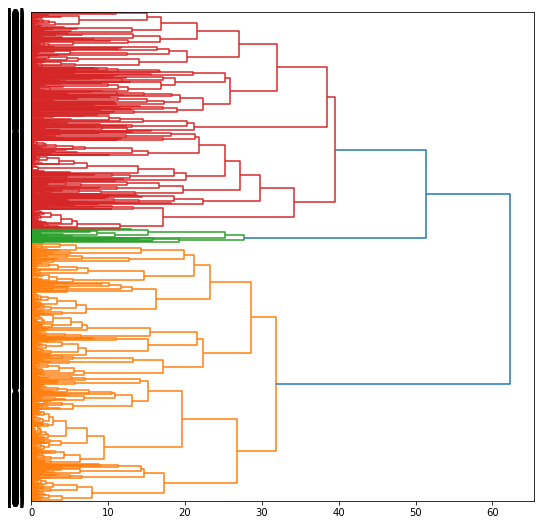

In [192]:
fig = pylab.figure(figsize=(9,9))

def llf(id):
    return '[%s]' % (df['Pets Allowed'][id] )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [193]:
# now using sklearn

from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(df_matrix,df_matrix) 
print(dist_matrix)

[[0.         0.33118537 0.14190304 ... 2.29212031 2.50877453 1.83651735]
 [0.33118537 0.         0.26107589 ... 2.2999839  2.51375312 1.83760502]
 [0.14190304 0.26107589 0.         ... 2.29944216 2.51274557 1.84399258]
 ...
 [2.29212031 2.2999839  2.29944216 ... 0.         1.87651211 2.17449009]
 [2.50877453 2.51375312 2.51274557 ... 1.87651211 0.         2.24408577]
 [1.83651735 1.83760502 1.84399258 ... 2.17449009 2.24408577 0.        ]]


In [194]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-194-bf9ca02f569b>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


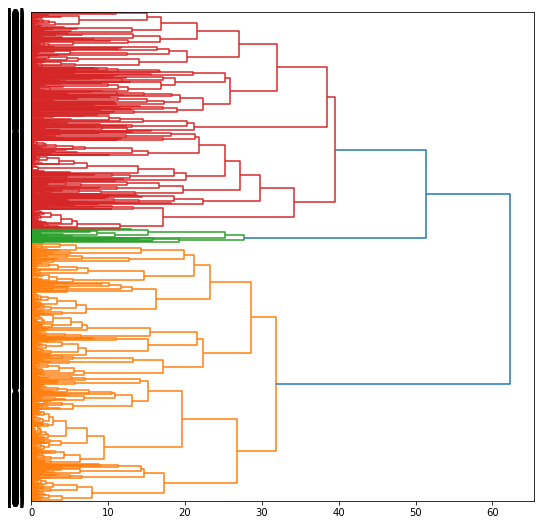

In [198]:
fig = pylab.figure(figsize=(9,9))

def llf(id):
    return '[%s]' % (df['Pets Allowed'][id] )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

-   **Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
-   Maximum or **complete** linkage minimizes the maximum distance between observations of pairs of clusters.
-   **Average** linkage minimizes the average of the distances between all observations of pairs of clusters.

In [199]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

/home/fredsena/anaconda3/envs/jupyterlab-debugger/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 0, 0, ..., 0, 0, 0])

In [202]:
df['cluster'] = agglom.labels_


In [201]:
df['cluster'].value_counts()

1    860
0    720
2     48
Name: cluster, dtype: int64

In [250]:
# ['page_url', 'number_bathrooms', 'number_bedrooms', 'description',
#        'display_address', 'features', 'manager_id', 'photos', 'price',
#        'number_of_views', 'created_at', 'price_period', 'Region', 'Parking',
#        'Central Heating', 'Washing Machine', 'Dryer', 'Dishwasher',
#        'Microwave', 'Pets Allowed', 'Wheelchair Access',
#        'Garden / Patio / Balcony', 'Serviced Property', 'price_period_code',
#        'Region_code']


#df.groupby(['cluster', 'Washing Machine', 'Dryer', 'Serviced Property'])['cluster'].count()


print(df.groupby(['cluster', 'Washing Machine'])['cluster'].count())


print(df.groupby(['cluster', 'Dryer'])['cluster'].count())


cluster  Washing Machine
0        0                  102
         1                  618
1        0                    3
         1                  857
2        0                   41
         1                    7
Name: cluster, dtype: int64
cluster  Dryer
0        0        474
         1        246
1        0        147
         1        713
2        0         47
         1          1
Name: cluster, dtype: int64


In [240]:
agg_apartment = df.groupby(['cluster'])['price'].mean()
agg_apartment

cluster
0    1728.629167
1    2048.900000
2    1485.250000
Name: price, dtype: float64

<AxesSubplot:>

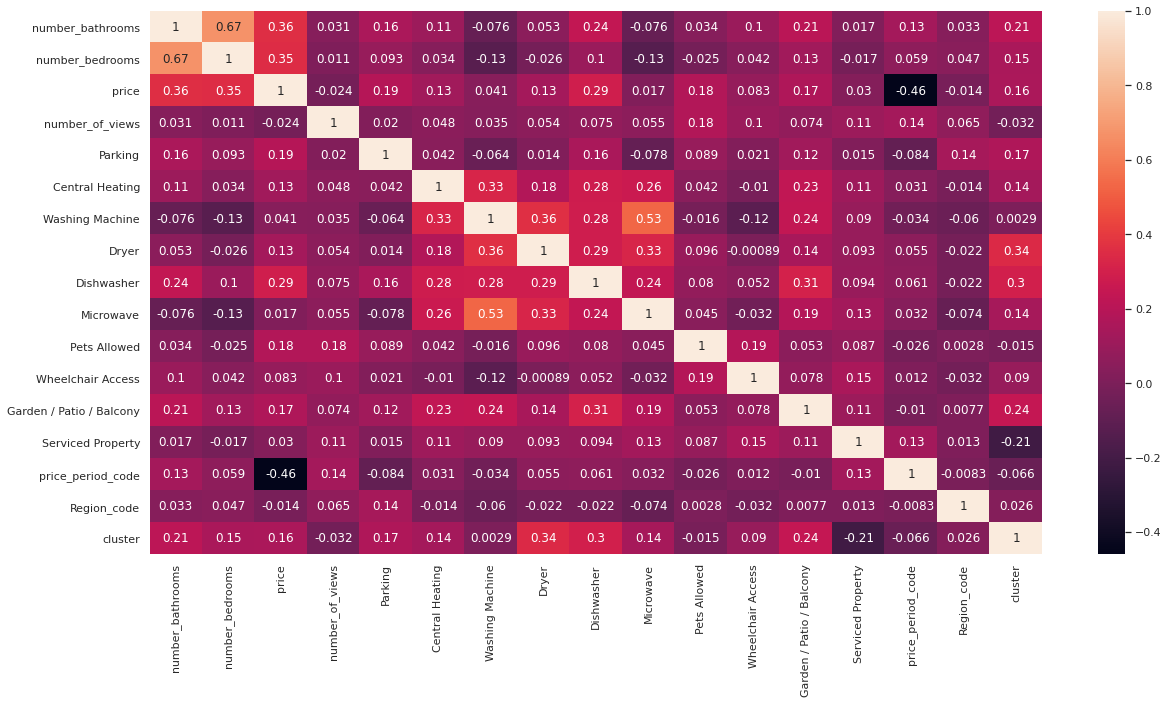

In [214]:
import seaborn as sns
sns.set()

plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [264]:
cluster2 = df[df['cluster'] == 2]
print(cluster2.shape)
cluster2.columns


(48, 26)


Index(['page_url', 'number_bathrooms', 'number_bedrooms', 'description',
       'display_address', 'features', 'manager_id', 'photos', 'price',
       'number_of_views', 'created_at', 'price_period', 'Region', 'Parking',
       'Central Heating', 'Washing Machine', 'Dryer', 'Dishwasher',
       'Microwave', 'Pets Allowed', 'Wheelchair Access',
       'Garden / Patio / Balcony', 'Serviced Property', 'price_period_code',
       'Region_code', 'cluster'],
      dtype='object')

In [232]:
features_analysis = ['number_bathrooms', 'number_bedrooms', 'price',
        'price_period', 'Region', 'Parking',
       'Central Heating', 'Washing Machine', 'Dryer', 'Dishwasher',
       'Microwave', 'Pets Allowed', 'Wheelchair Access',
       'Garden / Patio / Balcony', 'Serviced Property', 'Region_code', 'cluster']

cluster2[features_analysis].describe()


,number_bathrooms,number_bedrooms,price,Parking,Central Heating,Washing Machine,Dryer,Dishwasher,Microwave,Pets Allowed,Wheelchair Access,Garden / Patio / Balcony,Serviced Property,Region_code,cluster
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,2.020833,2.500000,1485.250000,0.541667,0.250000,0.145833,0.020833,0.083333,0.125000,0.229167,0.687500,0.312500,0.062500,11.729167,2.0
std,1.815882,2.062842,986.173877,0.503534,0.437595,0.356674,0.144338,0.279310,0.334219,0.424744,0.468417,0.468417,0.244623,7.493940,0.0
min,1.000000,1.000000,125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,381.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.250000,2.0
50%,1.000000,2.000000,1699.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,13.000000,2.0
75%,2.000000,2.000000,2000.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,18.000000,2.0
max,8.000000,8.000000,3850.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,2.0


In [238]:
# ['page_url', 'number_bathrooms', 'number_bedrooms', 'description',
#        'display_address', 'features', 'manager_id', 'photos', 'price',
#        'number_of_views', 'created_at', 'price_period', 'Region', 'Parking',
#        'Central Heating', 'Washing Machine', 'Dryer', 'Dishwasher',
#        'Microwave', 'Pets Allowed', 'Wheelchair Access',
#        'Garden / Patio / Balcony', 'Serviced Property', 'price_period_code',
#        'Region_code']


cluster2[features_analysis].groupby(['Washing Machine', 'Dryer' ])['cluster'].count()

Washing Machine  Dryer
0                0        41
1                0         6
                 1         1
Name: cluster, dtype: int64

In [252]:
agg_apartment_cluster2 = cluster2.groupby(['cluster'])['price'].mean()
agg_apartment_cluster2

cluster
2    1485.25
Name: price, dtype: float64

In [254]:
cluster2['Region'].value_counts()

Dublin 1             9
Dublin 8             8
Dublin 4             6
Dublin 2             5
Dublin 3             4
Dublin 7             4
Dublin 9             2
Dublin 13            1
Dublin 6             1
Dun Laoghaire A96    1
Dun Laoghaire A94    1
Dublin Fingal K67    1
Dublin Fingal K36    1
Dublin 12            1
South Dublin K78     1
Dublin 24            1
Dublin 15            1
Dublin 14            0
Dublin 6W            0
Dublin 11            0
Dublin 22            0
Dublin 20            0
Dublin 18            0
Dublin 16            0
Dun Laoghaire A9X    0
Dublin 5             0
Name: Region, dtype: int64

In [ ]:
# TODO: transform week prices into month prices

In [265]:
df.shape

(1628, 26)

In [266]:
df.columns

Index(['page_url', 'number_bathrooms', 'number_bedrooms', 'description',
       'display_address', 'features', 'manager_id', 'photos', 'price',
       'number_of_views', 'created_at', 'price_period', 'Region', 'Parking',
       'Central Heating', 'Washing Machine', 'Dryer', 'Dishwasher',
       'Microwave', 'Pets Allowed', 'Wheelchair Access',
       'Garden / Patio / Balcony', 'Serviced Property', 'price_period_code',
       'Region_code', 'cluster'],
      dtype='object')

In [269]:
features_export =  ['Region', 'Region_code', 'price_period', 'price_period_code', 'price',
                    'number_bathrooms', 'number_bedrooms', 'Parking', 'Central Heating', 
                    'Washing Machine', 'Dryer', 'Dishwasher', 'Microwave', 'Pets Allowed', 
                    'Wheelchair Access','Garden / Patio / Balcony', 'Serviced Property']

In [270]:

df[features_export].to_csv('data/daft_apartments_with_features.csv')